In [16]:
import numpy
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [17]:
all_df = pd.read_csv("data/titanic.csv")

In [18]:
cols=['survived','pclass' ,'sex', 'age',
       'fare',]
df=all_df[cols]
df.isnull().sum()
df=df.values

In [19]:
X = df[:,1:]
Y = df[:,0]
X[:5]

array([[  1.    ,   0.    ,  29.    , 211.3375],
       [  1.    ,   1.    ,   0.9167, 151.55  ],
       [  1.    ,   0.    ,   2.    , 151.55  ],
       [  1.    ,   1.    ,  30.    , 151.55  ],
       [  1.    ,   0.    ,  25.    , 151.55  ]])

In [20]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
X=minmax_scale.fit_transform(X) 
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

1046

In [21]:
train_Features[355:359]

array([[1.        , 0.        , 0.49895595, 0.01849397],
       [1.        , 0.        , 0.37369494, 0.04538098],
       [1.        , 1.        , 0.32359053, 0.01541158],
       [0.5       , 0.        , 0.38622104, 0.04098927]])

In [22]:
train_Label[:4]

array([1., 0., 0., 0.])

In [23]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

In [24]:
model = Sequential()

In [25]:
model.add(Embedding(input_dim=4,output_dim=1))

In [26]:
model.add(SimpleRNN(units=4))

In [27]:
model.add(Dense(1, activation = "sigmoid"))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 1)           4         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 4)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [30]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 941 samples, validate on 105 samples
Epoch 1/30
 - 2s - loss: 0.6786 - acc: 0.6057 - val_loss: 0.6581 - val_acc: 0.6571
Epoch 2/30
 - 0s - loss: 0.6596 - acc: 0.6057 - val_loss: 0.6350 - val_acc: 0.6571
Epoch 3/30
 - 0s - loss: 0.6417 - acc: 0.6057 - val_loss: 0.6176 - val_acc: 0.6571
Epoch 4/30
 - 0s - loss: 0.6172 - acc: 0.6079 - val_loss: 0.5973 - val_acc: 0.7524
Epoch 5/30
 - 0s - loss: 0.5844 - acc: 0.7726 - val_loss: 0.5747 - val_acc: 0.7524
Epoch 6/30
 - 0s - loss: 0.5507 - acc: 0.7726 - val_loss: 0.5568 - val_acc: 0.7524
Epoch 7/30
 - 0s - loss: 0.5241 - acc: 0.7726 - val_loss: 0.5441 - val_acc: 0.7524
Epoch 8/30
 - 0s - loss: 0.5089 - acc: 0.7726 - val_loss: 0.5378 - val_acc: 0.7524
Epoch 9/30
 - 0s - loss: 0.5010 - acc: 0.7726 - val_loss: 0.5345 - val_acc: 0.7524
Epoch 10/30
 - 0s - loss: 0.4944 - acc: 0.7726 - val_loss: 0.5297 - val_acc: 0.7524
Epoch 11/30
 - 0s - loss: 0.4906 - acc: 0.7726 - val_loss: 0.5281 - val_acc: 0.7524
Epoch 12/30
 - 0s - loss: 0.4876 - acc:

In [31]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

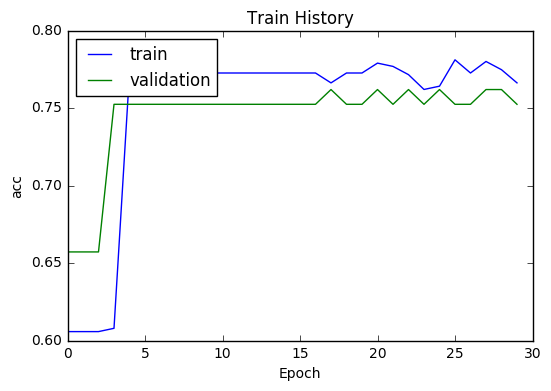

In [32]:
show_train_history(train_history,'acc','val_acc')

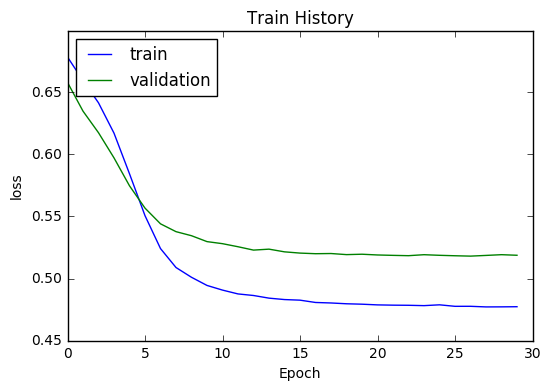

In [33]:
show_train_history(train_history,'loss','val_loss')

In [34]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

262/262 [==============================] - 0s 105us/step


In [35]:
scores[1]

0.8320610682472928